In [2]:
import re
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
#pip install vaderSentiment
#pip install wordcloud
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

In [4]:
review = pd.read_csv("hinge_google_play_reviews.csv")
review

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOERa0hhUWh0lijBM23w2qKw8EpKjZhlS53RZt3...,Nikolas Adams,https://play-lh.googleusercontent.com/a-/AOh14...,best for a relationship,5,0,8.30.0,2022-04-03 22:28:05,NaN,NaN
1,gp:AOqpTOG0GLZiwOVHz-W6YUSY3KiAEWEU-s-g0A3y87w...,Azzerraya Love,https://play-lh.googleusercontent.com/a/AATXAJ...,Banned for no reason,1,0,8.5.1,2022-04-03 21:21:34,NaN,NaN
2,gp:AOqpTOGLX8MX3-X6KbWVMMMUaFVd1wqhxv2WckyFODL...,Charlie Mears,https://play-lh.googleusercontent.com/a-/AOh14...,Bad app. Basic functions are locked behind a p...,1,0,NaN,2022-04-03 20:56:40,NaN,NaN
3,gp:AOqpTOGN4agB2frxwupCJgW103NWSnctvN7fTNW9lCN...,Stephenie Tabor,https://play-lh.googleusercontent.com/a-/AOh14...,I can't get it to eve let me set up an account...,1,0,8.30.0,2022-04-03 20:29:49,NaN,NaN
4,gp:AOqpTOFOe771bMsitAV2FyWFVq0Z7TfEtHv8_FTgudJ...,Elliot Funt,https://play-lh.googleusercontent.com/a-/AOh14...,Owned and controlled by Tinder. Loads very slo...,2,0,8.30.0,2022-04-03 20:14:29,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
53962,gp:AOqpTOF716nAlA4zJ1YfDMO3SoLm07SfgJDklo-YaSE...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Useless - I'm in the UK and it tells me i'm ov...,2,5,5.2.0,2017-07-11 20:14:10,Sorry for the error there. The sudden heavy in...,2017-07-11 21:31:17
53963,gp:AOqpTOEawNzSBN9J1g9e-K7TNMTOsGgGdDDMbNOKnbb...,Brian Shook,https://play-lh.googleusercontent.com/a-/AOh14...,I can't get past the initial set up. It won't...,1,11,5.2.0,2017-07-11 20:06:57,Sorry for the error there. The sudden heavy in...,2017-07-11 21:31:11
53964,gp:AOqpTOFnzJGZ7vn5z41-nTHH80TcDtmsVzA0XW-kZNd...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This is incredible! A quality dating app for A...,5,1,5.2.0,2017-07-11 20:02:32,Right?? We've already seen a lot of new relati...,2017-07-11 21:39:24
53965,gp:AOqpTOE9rfc-IqDZl3BY_DEDs7KcxtQjPfmyTnIClPp...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"""Over Water"" ... Can't choose location.",2,8,5.2.0,2017-07-11 19:58:27,Sorry for the error there. The sudden heavy in...,2017-07-11 21:30:50


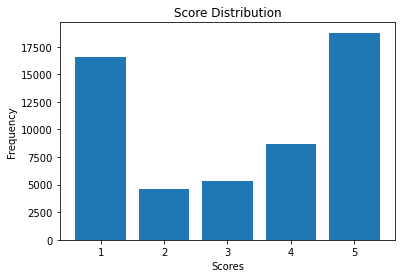

In [5]:
values,freq = np.unique(review['score'],return_counts=True)
plt.bar(values,freq)
plt.title("Score Distribution")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.show()

In [6]:
print('Max Time: {}'.format(max(review['at'])))
print('Min Time: {}'.format(min(review['at'])))

Max Time: 2022-04-03 22:28:05
Min Time: 2017-07-11 19:54:31


In [7]:
review[["date",'time']] = review["at"].str.split(" ", expand = True)
review[['year','month','day']]=review['date'].str.split("-",expand=True)
review

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,date,time,year,month,day
0,gp:AOqpTOERa0hhUWh0lijBM23w2qKw8EpKjZhlS53RZt3...,Nikolas Adams,https://play-lh.googleusercontent.com/a-/AOh14...,best for a relationship,5,0,8.30.0,2022-04-03 22:28:05,NaN,NaN,2022-04-03,22:28:05,2022,04,03
1,gp:AOqpTOG0GLZiwOVHz-W6YUSY3KiAEWEU-s-g0A3y87w...,Azzerraya Love,https://play-lh.googleusercontent.com/a/AATXAJ...,Banned for no reason,1,0,8.5.1,2022-04-03 21:21:34,NaN,NaN,2022-04-03,21:21:34,2022,04,03
2,gp:AOqpTOGLX8MX3-X6KbWVMMMUaFVd1wqhxv2WckyFODL...,Charlie Mears,https://play-lh.googleusercontent.com/a-/AOh14...,Bad app. Basic functions are locked behind a p...,1,0,NaN,2022-04-03 20:56:40,NaN,NaN,2022-04-03,20:56:40,2022,04,03
3,gp:AOqpTOGN4agB2frxwupCJgW103NWSnctvN7fTNW9lCN...,Stephenie Tabor,https://play-lh.googleusercontent.com/a-/AOh14...,I can't get it to eve let me set up an account...,1,0,8.30.0,2022-04-03 20:29:49,NaN,NaN,2022-04-03,20:29:49,2022,04,03
4,gp:AOqpTOFOe771bMsitAV2FyWFVq0Z7TfEtHv8_FTgudJ...,Elliot Funt,https://play-lh.googleusercontent.com/a-/AOh14...,Owned and controlled by Tinder. Loads very slo...,2,0,8.30.0,2022-04-03 20:14:29,NaN,NaN,2022-04-03,20:14:29,2022,04,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53962,gp:AOqpTOF716nAlA4zJ1YfDMO3SoLm07SfgJDklo-YaSE...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Useless - I'm in the UK and it tells me i'm ov...,2,5,5.2.0,2017-07-11 20:14:10,Sorry for the error there. The sudden heavy in...,2017-07-11 21:31:17,2017-07-11,20:14:10,2017,07,11
53963,gp:AOqpTOEawNzSBN9J1g9e-K7TNMTOsGgGdDDMbNOKnbb...,Brian Shook,https://play-lh.googleusercontent.com/a-/AOh14...,I can't get past the initial set up. It won't...,1,11,5.2.0,2017-07-11 20:06:57,Sorry for the error there. The sudden heavy in...,2017-07-11 21:31:11,2017-07-11,20:06:57,2017,07,11
53964,gp:AOqpTOFnzJGZ7vn5z41-nTHH80TcDtmsVzA0XW-kZNd...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This is incredible! A quality dating app for A...,5,1,5.2.0,2017-07-11 20:02:32,Right?? We've already seen a lot of new relati...,2017-07-11 21:39:24,2017-07-11,20:02:32,2017,07,11
53965,gp:AOqpTOE9rfc-IqDZl3BY_DEDs7KcxtQjPfmyTnIClPp...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"""Over Water"" ... Can't choose location.",2,8,5.2.0,2017-07-11 19:58:27,Sorry for the error there. The sudden heavy in...,2017-07-11 21:30:50,2017-07-11,19:58:27,2017,07,11


<BarContainer object of 6 artists>

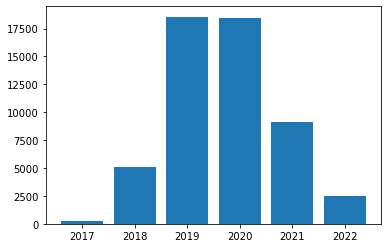

In [8]:
review['year'] = review['year'].astype(str).astype(int)
years,freq = np.unique(review['year'],return_counts=True)
plt.bar(years,freq)

[[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1]]


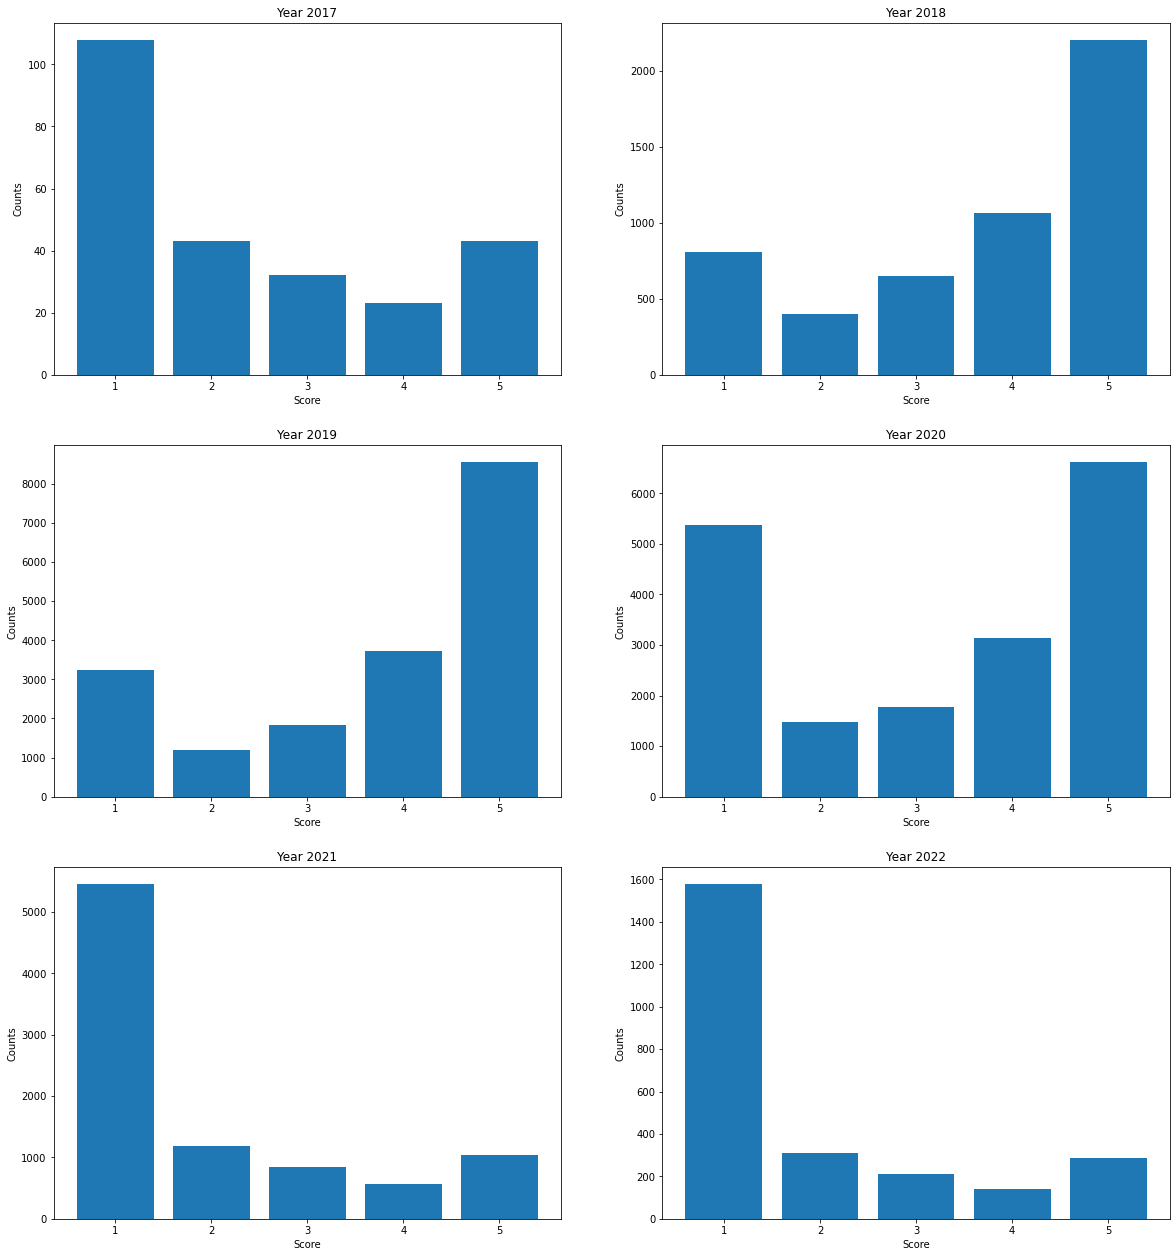

In [9]:
fig, ax = plt.subplots(3,2,figsize=(20,22))
axis = []
for i in range(3):
    for j in range(2):
        axis.append([i,j])
print(axis)
a = 0
for i in years:
    year_review = review[review['year'] == i]
    score,freq = np.unique(year_review['score'],return_counts=True)
    x,y = axis[a]
    ax[x,y].bar(score,freq)
    ax[x,y].set_title(f"Year {i}")
    ax[x,y].set_xlabel("Score")
    ax[x,y].set_ylabel("Counts")
    a += 1

In [10]:
score_freq = []
for i in years:
    year_review = review[review['year'] == i]
    score,freq = np.unique(year_review['score'],return_counts=True)
    #print(f"Year - {i}")
    sf = []
    for s,j in enumerate(freq):
        #print(f"Score {s+1}\nFreq  {j}")
        sf.append(j)
    #print("\n")
    score_freq.append(sf)
score_freq = pd.DataFrame(score_freq)
score_freq['Total'] = score_freq.sum(axis=1)
score_freq['Years'] = years
score_freq.columns = [1,2,3,4,5,'Total','Years']
score_freq

,1,2,3,4,5,Total,Years
0,108,43,32,23,43,249,2017
1,808,397,650,1065,2205,5125,2018
2,3243,1203,1839,3713,8561,18559,2019
3,5372,1477,1781,3145,6626,18401,2020
4,5461,1185,840,574,1046,9106,2021
5,1579,309,210,142,287,2527,2022


In [11]:
score_percent = []
x,y = np.shape(score_freq)
for i in range(x):
    sp = []
    for j in range(y-2):
        x = round((score_freq.iloc[i,j]/sum(score_freq.loc[i,:5]))*100)
        sp.append(x)
    score_percent.append(sp)
score_percent = pd.DataFrame(score_percent)
score_percent['Years'] = years
score_percent.columns = [1,2,3,4,5,'Years']
score_percent

,1,2,3,4,5,Years
0,43,17,13,9,17,2017
1,16,8,13,21,43,2018
2,17,6,10,20,46,2019
3,29,8,10,17,36,2020
4,60,13,9,6,11,2021
5,62,12,8,6,11,2022


In [12]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [13]:
def clean_text(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    text = str(text).lower()
    text = word_tokenize(text)
    text = [item for item in text if item not in stop_words]
    text = [lemma.lemmatize(word=w,pos='v') for w in text]
    text = [i for i in text if len(i)>2]
    text = ' '.join(text)
    return text

In [14]:
review['content'] = review['content'].astype('str')

In [15]:
review['clean_text'] = review['content'].apply(clean_text)

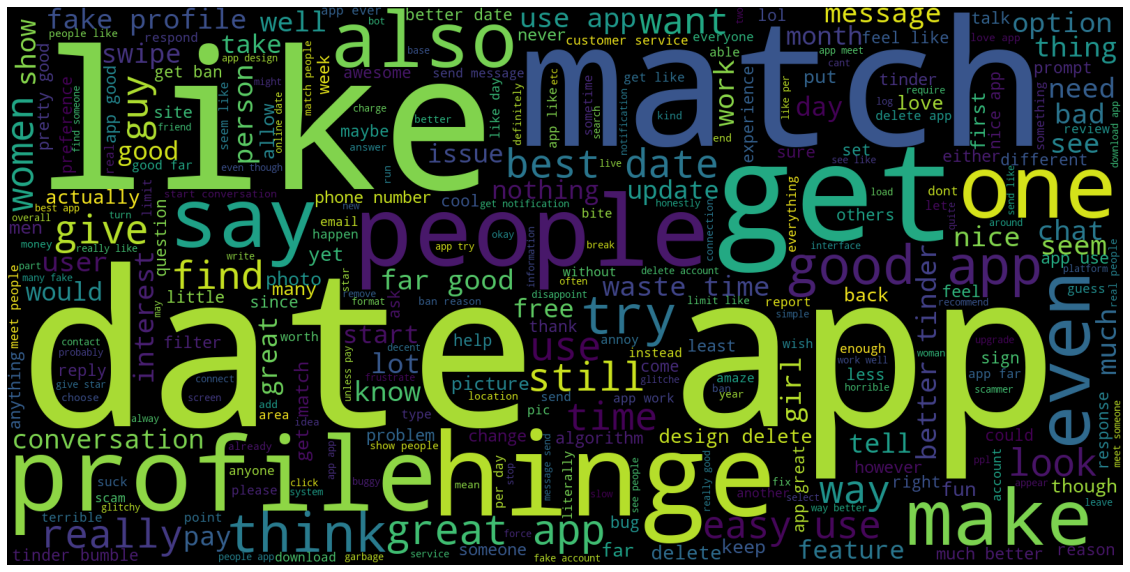

In [16]:
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=stop_words).generate(str(" ".join(review.clean_text)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [17]:
analyzer = SentimentIntensityAnalyzer()

In [18]:
def format_output(output_dict):

    polarity = "neutral"
    # I think we should use better
    if(output_dict['compound']>= 0.05):
        polarity = "positive"

    elif(output_dict['compound']<= -0.05):
        polarity = "negative"

    return polarity

def predict_sentiment(text):
  
    output_dict =  analyzer.polarity_scores(text)
    #print(output_dict)
    return format_output(output_dict)

# Run the predictions
review["vader_prediction"] = review["clean_text"].apply(predict_sentiment)

review

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,date,time,year,month,day,clean_text,vader_prediction
0,gp:AOqpTOERa0hhUWh0lijBM23w2qKw8EpKjZhlS53RZt3...,Nikolas Adams,https://play-lh.googleusercontent.com/a-/AOh14...,best for a relationship,5,0,8.30.0,2022-04-03 22:28:05,NaN,NaN,2022-04-03,22:28:05,2022,04,03,best relationship,positive
1,gp:AOqpTOG0GLZiwOVHz-W6YUSY3KiAEWEU-s-g0A3y87w...,Azzerraya Love,https://play-lh.googleusercontent.com/a/AATXAJ...,Banned for no reason,1,0,8.5.1,2022-04-03 21:21:34,NaN,NaN,2022-04-03,21:21:34,2022,04,03,ban reason,negative
2,gp:AOqpTOGLX8MX3-X6KbWVMMMUaFVd1wqhxv2WckyFODL...,Charlie Mears,https://play-lh.googleusercontent.com/a-/AOh14...,Bad app. Basic functions are locked behind a p...,1,0,NaN,2022-04-03 20:56:40,NaN,NaN,2022-04-03,20:56:40,2022,04,03,bad app basic function lock behind pay wall li...,negative
3,gp:AOqpTOGN4agB2frxwupCJgW103NWSnctvN7fTNW9lCN...,Stephenie Tabor,https://play-lh.googleusercontent.com/a-/AOh14...,I can't get it to eve let me set up an account...,1,0,8.30.0,2022-04-03 20:29:49,NaN,NaN,2022-04-03,20:29:49,2022,04,03,get eve let set account let alone use app,negative
4,gp:AOqpTOFOe771bMsitAV2FyWFVq0Z7TfEtHv8_FTgudJ...,Elliot Funt,https://play-lh.googleusercontent.com/a-/AOh14...,Owned and controlled by Tinder. Loads very slo...,2,0,8.30.0,2022-04-03 20:14:29,NaN,NaN,2022-04-03,20:14:29,2022,04,03,own control tinder load slow reason,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53962,gp:AOqpTOF716nAlA4zJ1YfDMO3SoLm07SfgJDklo-YaSE...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Useless - I'm in the UK and it tells me i'm ov...,2,5,5.2.0,2017-07-11 20:14:10,Sorry for the error there. The sudden heavy in...,2017-07-11 21:31:17,2017-07-11,20:14:10,2017,07,11,useless tell water let get run little test guy...,negative
53963,gp:AOqpTOEawNzSBN9J1g9e-K7TNMTOsGgGdDDMbNOKnbb...,Brian Shook,https://play-lh.googleusercontent.com/a-/AOh14...,I can't get past the initial set up. It won't...,1,11,5.2.0,2017-07-11 20:06:57,Sorry for the error there. The sudden heavy in...,2017-07-11 21:31:11,2017-07-11,20:06:57,2017,07,11,get past initial set set neighborhood think ne...,neutral
53964,gp:AOqpTOFnzJGZ7vn5z41-nTHH80TcDtmsVzA0XW-kZNd...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This is incredible! A quality dating app for A...,5,1,5.2.0,2017-07-11 20:02:32,Right?? We've already seen a lot of new relati...,2017-07-11 21:39:24,2017-07-11,20:02:32,2017,07,11,incredible quality date app android boyfriend wya,neutral
53965,gp:AOqpTOE9rfc-IqDZl3BY_DEDs7KcxtQjPfmyTnIClPp...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"""Over Water"" ... Can't choose location.",2,8,5.2.0,2017-07-11 19:58:27,Sorry for the error there. The sudden heavy in...,2017-07-11 21:30:50,2017-07-11,19:58:27,2017,07,11,water choose location,neutral


In [21]:
polar,freq = np.unique(review["vader_prediction"],return_counts=True)
positive = (freq[2]/(sum(freq))*100).round(2)
neutral = (freq[1]/(sum(freq))*100).round(2)
negative = (freq[0]/(sum(freq))*100).round(2)
print(f"Positive : {positive}\nNegative : {negative}\nNeutral  : {neutral}")

Positive : 64.13
Negative : 20.75
Neutral  : 15.12


In [22]:
score,freq = np.unique(review["score"],return_counts=True)
score,freq
positive_score = ((freq[4]+freq[3])/(sum(freq))*100).round(2)
negative_score = ((freq[0]+freq[1])/(sum(freq))*100).round(2)
neutral_score = ((freq[2])/(sum(freq))*100).round(2)
print(f"Positive Score: {positive_score}\nNegative Score: {negative_score}\nNeutral Score: {neutral_score}")

Positive Score: 50.83
Negative Score: 39.26
Neutral Score: 9.92
